# First we set up the environment

In [1]:
!pip install fastai

# Importing the fast vision library

In [2]:
from fastai.vision.all import *

# We then prepare our data

we will use the the CIFAR-10 dataset as an example to classify images

In [3]:
path = untar_data(URLs.CIFAR)

In [4]:

print("Directories in dataset:", [d.name for d in path.iterdir() if d.is_dir()])
print("Directories in train:", [d.name for d in (path/'train').iterdir() if d.is_dir()])

Directories in dataset: ['test', 'train']
Directories in train: ['horse', 'ship', 'frog', 'automobile', 'dog', 'bird', 'deer', 'truck', 'airplane', 'cat']


We learn that the dataset has 10 classes 'airplane', 'bird', 'deer', 'cat', 'horse', 'dog', 'frog', 'truck', 'automobile', 'ship'

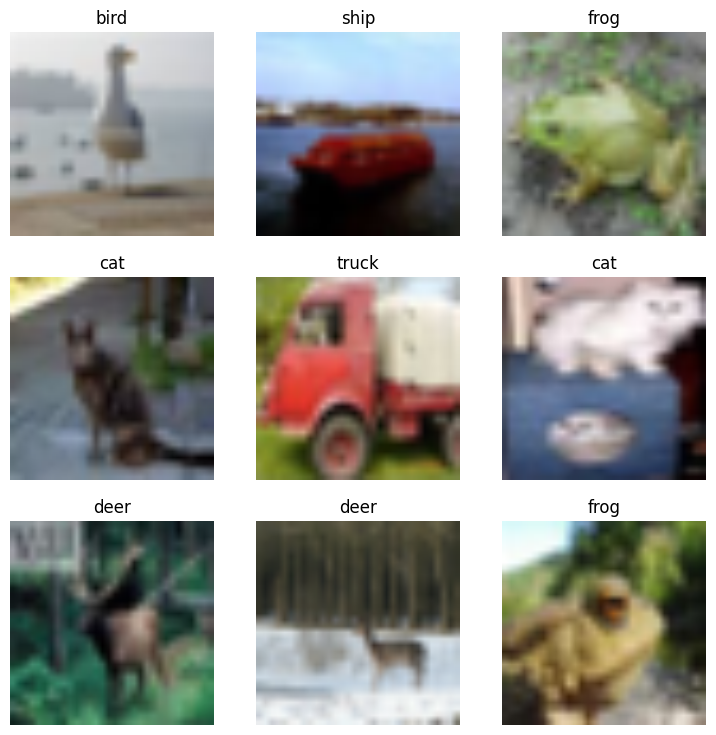

In [5]:
dls = ImageDataLoaders.from_folder(path, # the root directory of the dataset
                                   train='train', # the name of the folder in path that contains the data we want to train
                                   valid='test',  # again the name of the folder in the path for the data that will act as validation
                                   item_tfms=Resize(224), # ensures that all images are of the same before batching them tgthr
                                   bs=64, # the batch size, which is the number of images procesed before the model internal parameter changes
                                   num_workers=0)
dls.show_batch()

# Behind the Scenes
When you execute the ImageDataLoaders.from_folder method Fastai does several things under the hood:

Automatically infers classes: Based on the subdirectory names within the train and valid directories.
Splits the data: Into training and validation sets according to the folders.
Applies transformations: Both item and batch level transformations are prepared, but batch level transforms are applied during training.
Creates DataLoader objects: For both training and validation datasets, which are then combined into a DataLoaders object. These objects are iterators that efficiently load batches of data to be fed into the model during training.
This step is critical because it ensures that your data is correctly formatted and ready for training, allowing you to focus on building and training your model.








# Now We Define the model
* after we have already loaded the data the next crucial step is defining the our model we will use to trian the data
* This involves selecting an appropiate neural network architecture that fits our task of image classification and wrapping it in a Fastai learner object

In [6]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 149MB/s]


# Selecting a Pre-trained Model
resnet18: This specifies the architecture of the neural network we want to use. ResNet-18 is a popular choice for image classification tasks due to its good balance between performance and computational efficiency. It's part of the ResNet family, which introduced residual connections to enable the training of very deep networks. By specifying resnet18, we're not just choosing the architecture; we're also loading a version of the model that has been pre-trained on the ImageNet dataset. This pre-training helps in achieving higher accuracy even with relatively small datasets like CIFAR-10, as the model has already learned a lot of useful features from ImageNet.

# The Learner
cnn_learner: This function is specifically designed for convolutional neural networks (CNNs), which are the standard type of model for image-related tasks. cnn_learner takes care of several things under the hood:
Automatically adapting the model for your specific task: It modifies the last layer of the pre-trained model so that it outputs the correct number of predictions for your dataset (10 in the case of CIFAR-10).
Applying recommended default transformations: These include normalization using the statistics from the ImageNet dataset, which helps because we're using a model pre-trained on ImageNet.
Setting up the optimizer: Fastai selects a suitable optimizer for training the model, with default parameters that generally work well.

# Metrics
metrics=accuracy: This tells the Learner to evaluate the model using accuracy as the metric during training. Accuracy is a common metric for classification tasks, representing the proportion of correctly classified images. Specifying it here allows us to monitor the model's performance and make adjustments if necessary.

# What the Learner Does
The Learner object in Fastai is a powerful abstraction that bundles together the model, the data (loaded in the previous step), and everything needed to train and evaluate the model. It provides a unified interface for:

Training the model with methods like fit, fit_one_cycle, and fine_tune.
Making predictions with methods like predict and get_preds.
Evaluating the model with the specified metrics.
Visualizing results and making adjustments based on model performance.

In summary, this step of defining the model with cnn_learner sets up everything we need to start training our image classifier. It encapsulates the complexity of configuring a neural network for a specific task, allowing us to focus on experimenting with different architectures and hyperparameters to improve our model's performance.







*by chatgpt.*

# Next step the learning rate
now we need to find an optimal learning rate for training our model. This step is crucial for effective model training, as the learning rate controls how much the model's weights are adjusted during training. A learning rate that's too high can cause the model to converge too quickly to a suboptimal solution, or even diverge, while a learning rate that's too low can make the training process unnecessarily slow and potentially get stuck in local minima.

# Find an Optimal Learning Rate


SuggestedLRs(valley=0.0008317637839354575)

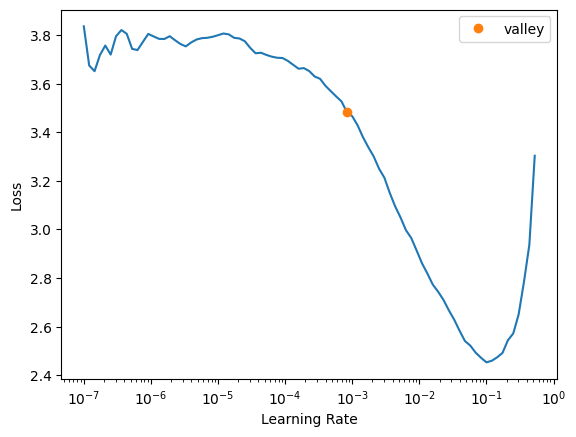

In [7]:
learn.lr_find()

# How lr_find Works
Learning Rate Finder: The lr_find method implements the Learning Rate Finder technique introduced by Leslie N. Smith. It's a clever method that helps to identify a good learning rate for training your model.

**Procedure:** It starts by training the model for a few epochs with exponentially increasing learning rates, from a very small value to a very large one. Then, it *plots the loss against the learning rate*.

**Interpretation**: The idea is to look for a learning rate where the loss is decreasing and pick a value slightly lower than the point where the loss starts to increase again. This is typically in the region where the slope of the plot is steeply descending.

# What Happens Under the Hood
* **Temporary Training**: During lr_find, the model is trained on a small subset of the data for a limited number of iterations, and the weights updated during this process are not saved. This is to ensure that the process of finding the learning rate does not affect the model's initial state.
* **Plotting the Loss**: After running lr_find, you get a plot showing the loss versus the learning rate. The x-axis (learning rate) is in log scale. You should look for the sharpest downward slope on the graph.
Choosing a Learning Rate
Optimal Range: You want to choose a learning rate from the middle of the sharpest downward slope. If you pick a rate that's too low (before the slope), training will be slow. If you pick a rate that's too high (after the slope starts to rise), you risk overshooting the minimum loss.
Rule of Thumb: A common practice is to pick a learning rate about one order of magnitude below the lowest point of loss before it starts to increase again.


# Why It's Important
This step is a key part of the Fastai training process because it helps to ensure that the model trains efficiently and effectively. By automating the process of finding a good learning rate, Fastai makes it easier for practitioners to focus on model architecture and problem-solving, rather than on the trial-and-error process of tuning hyperparameters.

Finding an optimal learning rate can significantly impact the model's training time and final performance. It's an example of how Fastai abstracts complex aspects of model training, making deep learning more accessible.





